In [50]:
#Importing pandas to read and manipulate data
import pandas as pd

#Used to ignore false positive warning when slicing dataframe
pd.options.mode.chained_assignment = None

#Used for graphing
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Circle, Rectangle, Arc

In [51]:
#Reading the NBA data on the csv file into a dataframe
#CSV file is located in the same directory as the ipynb file so the full path is not needed
df = pd.read_csv("NBAData.csv")

In [52]:
#*/-------------------------------------------
# Code created by Savvas Tjortjoglou -> Used to draw court on graph
# Author: Savvas Tjortjoglou (savvastjortjoglou.com)
# ***I DID NOT COME UP WITH THIS CODE***

def plot_court(lw, color):
    
    ax = plt.gca()
    
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)
    
    backboard = Rectangle((-30, -7.5), 60, -1,\
                           linewidth=lw, color=color)
    outer_box = Rectangle((-80, -47.5), 160, 190,\
                           linewidth=lw, color=color, fill=False)
    inner_box = Rectangle((-60, -47.5), 120, 190,\
                           linewidth=lw, color=color, fill=False)
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,\
                          linewidth=lw, color=color, fill=False)
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,\
                             linewidth=lw, color=color, linestyle='dashed')
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180,\
                      linewidth=lw, color=color)
    corner_three_a = Rectangle((-220, -47.5), 0, 140,\
                                linewidth=lw, color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140,\
                                linewidth=lw, color=color)
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158,\
                     linewidth=lw, color=color)
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,\
                            linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,\
                            linewidth=lw, color=color)
    court = [hoop, backboard, outer_box, inner_box, top_free_throw,\
                      bottom_free_throw, restricted, corner_three_a,\
                      corner_three_b, three_arc, center_outer_arc,\
                      center_inner_arc]
    for item in court:
        ax.add_patch(item)
#*/-------------------------------------------

In [53]:
#Function used to plot the shots onto a graph using the X and Y Location provided by the data
#Params: data -> filtered data, color -> color of graph, alpha -> transparency of each data point
#        year -> year in which data is describing, player -> player in which data is for
#        reg_or_playoff -> whether the game type is regular season, playoffs, or both

def plot_map(data, color, size, alpha, year, player, reg_or_playoff):
    #Using a seaborn relplot to plot all the points using their X and Y location
    sns.relplot(data = data, x = "X Location", y = "Y Location",\
                color = color, size = size, alpha = alpha, legend = False)
    
    #Setting the title of the graph
    plt.title(str(player) + " Shot Distribution in the " +\
              str(year) + " "+str(reg_or_playoff))
    #Removing the x and y axes from the graph to make it look more like a basketball court
    plt.axis("off")
    #Setting the x and y limits to keep the shape of the court uniform for any shot distribution
    plt.xlim(-250, 250)
    plt.ylim(-50, 450)
    
    #Calling the function used to draw the court onto the graph
    #plot_court IS NOT A FUNCTION I CREATED
    # Code created by Savvas Tjortjoglou -> Used to draw court on graph
    # Author: Savvas Tjortjoglou (savvastjortjoglou.com)
    plot_court(2, "black")

In [72]:
#The main procedure of the program
#Filters the dataset to match the user input, and calls the plot_map function to present the graphs
#Using NBA as the player name allows for the shot chart of the entire league to be seen
#The same year and player and game type can be used for..
#year1,year2, and player1, player2, and for reg_or_playoff

#Params: year1,year2 -> year that will be for player1, player2
#        player1, player2 -> players whose shot chart/heatmap will be compared
#        player1_reg_or_playoff, player2_reg_or_playoff -> game types for player 1 and player 2

def compare_nba_heatmap(year1, year2, player1, player2, player1_reg_or_playoff, player2_reg_or_playoff):
    #Creating a list of the years, players, and game types to loop through
    year_list = [year1, year2]
    player_list = [player1, player2]
    reg_or_playoff_list = [player1_reg_or_playoff, player2_reg_or_playoff]
    
    
    #Looping through each list and storing the contents in...
    #the year, player, and game_type variables accordingly   
    #This loop is used to halve the lines of code needed to filter the data...
    #for each parameter of the function (year, player, reg_or_playoff)
    #Repeats the process for filtering data and plotting the shots and court...
    #for each year, player, and game_type
    
    #Has scalability as it is possible to increase the number of parameters... 
    #in the function and allow the user to use as many years, players, and game_types as they want
    for year, player, game_type in zip(year_list, player_list, reg_or_playoff_list):
        
        #Creating a dataframe that is filtered by the year(s) in year_list
        year_df = df[df['Game Date'].astype(str).str.startswith(str(year))]
        #Manually setting the column of the date to be just the year...
        #without days or months for easier manipulation
        year_df['Game Date'] = str(year)
        
        #If else statement to determine whether or not to use all player data for that year..
        #or just one player's
        if (player == "NBA"):
            player_data = year_df
        else:
            #If it is a specific player, filter the data so that the only shots are by player
            player_data = year_df[year_df["Player Name"] == player]
        
        #If else statement to determine whether or not to use the entire season,
        #or only regular season or playoffs    
        if (game_type == "Both"):
            player_data_complete = player_data
            #Manually changing game_type if "Both" to regular season and playoffs
            #for setting the title of the graph in plot_map function
            game_type = "Regular Season and Playoffs"
        else:
            #Filtering the data to show only the shots taken in games matching the game_type
            player_data_complete = player_data[player_data["Season Type"] == game_type]    
            
            
        #Creating a conditional clause used to determine what to set the alpha (transparency)
        #of each data point based on the total number of shots
        
        #I did this to ensure that players with very few shots would still have visible shot charts,
        #and to ensure that players/NBA with a lot of shots would not be a completeley solid graph
        
        #If total shots > 10000, set alpha to 0.01
        if (len(player_data_complete["X Location"]) > 10000):
            alpha = 0.01            
        #If total shots > 5000, set alpha to 0.05
        elif (len(player_data_complete["X Location"]) > 5000):
            alpha = 0.05
        #If total shots > 1000, set alpha to 0.25
        elif (len(player_data_complete["X Location"]) > 1000):
            alpha = 0.25
        #If total shots <1000, set alpha to 0.4
        else:
            alpha = 0.4
        #Calling the plot_map function and passing it the player_data
        plot_map(player_data_complete, "indianred", 0.01,\
                 alpha, year, player, game_type)
        #Saving the graphs created as png files in the present working directory
        plt.savefig(str(player)+str(year)+'heatmap.png', bbox_inches='tight')

Enter Year (1998-2019) for Player 1: 1998
Enter Year (1998-2019) for Player 2: 2019
Enter Name of Player 1 (if whole league, enter NBA): NBA
Enter Name of Player 2 (if whole league, enter NBA): NBA
Enter the Player 1 Game Type (Regular Season, Playoffs, or Both): Both
Enter the Player 2 Game Type (Regular Season, Playoffs, or Both): Both


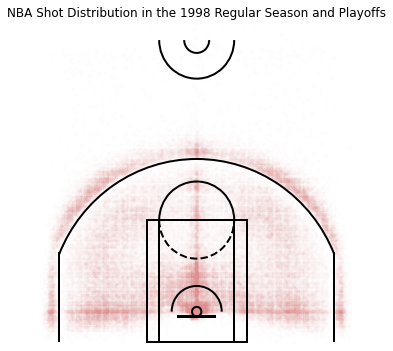

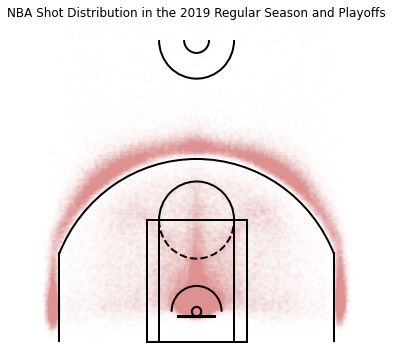

Would you like to compare again? (enter "Yes" or "No"): No


In [75]:
#Boolean used to continue in while loop/exit from while loop
go_again = True

#While go again is true:
#the process of user input and then graphing the shot charts/heatmaps of will keep going
#This while loop allows the user to enter "Yes" or "No" to determine if they want to keep going
while (go_again):
    
    #Reading input from the user for the years, players, and game types
    user_year1 = int(input("Enter Year (1998-2019) for Player 1: "))
    user_year2 = int(input("Enter Year (1998-2019) for Player 2: "))
    user_player1 = str(input("Enter Name of Player 1 (if whole league, enter NBA): "))
    user_player2 = str(input("Enter Name of Player 2 (if whole league, enter NBA): "))
    user_player1_game_type = str(input("Enter the Player 1 Game Type (Regular Season, Playoffs, or Both): "))
    user_player2_game_type = str(input("Enter the Player 2 Game Type (Regular Season, Playoffs, or Both): "))
    
    #Calling the function that will filter the data based on the user input and then graph the shots
    compare_nba_heatmap(user_year1, user_year2, user_player1, user_player2,\
                        user_player1_game_type, user_player2_game_type)
    
    #Displaying the graphs/heatmaps
    plt.show()
    #Prompting the user to enter whether they would like to compare again
    #Use lower() to ensure that capitalization differences will not affect the decision
    user_go_again = str(input("Would you like to compare again? (enter \"Yes\" or \"No\"): ")).lower()
    #If they entered no, change go_again to false, thus exiting the loop
    if (user_go_again == "no"):
        go_again = False

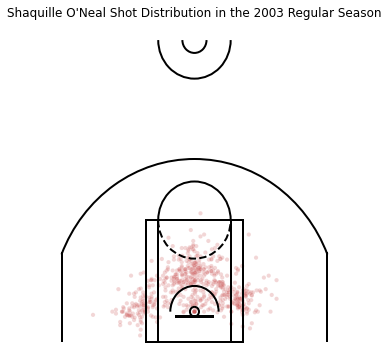

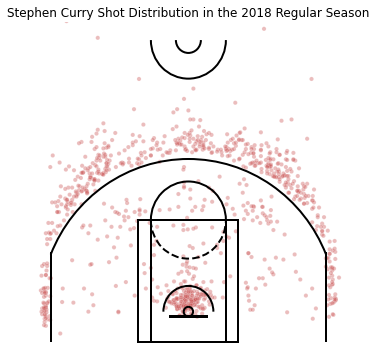

In [76]:
#Manual call of function (without using the while-loop and user input)
compare_nba_heatmap(2003, 2018, "Shaquille O'Neal", "Stephen Curry", "Regular Season", "Regular Season")